Carlos me ha compartido una base de datos de alrededor de cuatro mil observaciones, con diferentes características físicas de inmuebles en venta en Barcelona. Algunas de esas características físicas son parte de una evaluación detallada sobre la calidad arquitectónica de estos inmuebles. Veamos qué apariencia tienen.

# 1. Revisión y limpieza de datos

Primero, cargamos las librerías a usar.

In [2]:
import pandas as pd
import numpy as np
import pyreadstat

Importamos el archivo y revisamos si tiene filas vacías.

In [3]:
h=pd.read_spss('rawdata/BDDHabitaclia_4043_join.sav')
h.isnull().values.any()

True

El código nos indica que sí. Antes de pasar a eliminar aquellas filas vacías, veamos cuántas filas tiene de momento la base de datos.

In [6]:
len(h)

4043

Ahora sí elimino las filas vacías.

In [4]:
h = h.dropna()

Vuelvo a revisar cuántas filas tiene ahora.

In [9]:
len(h)

3846

Ahora reviso las columnas.

In [12]:
print(h.columns.tolist())

['OBJECTID_1', 'codigo_inmueble1', 'Title', 'Type_build', 'Type_opera', 'Link', 'Location', 'Lat_X', 'Lon_Y', 'Climatic_Z', 'Nom_Mun', 'precio_eur', 'superficie', 'superficie_2', 'Unit_price', 'Ln_total_pr', 'Ln_unit_pr', 'numero_habitaciones', 'numero_bano', 'ratio_bano_hab', 'numero_aseo', 'ascensor', 'interac_planta', 'numero_de_piso', 'anyo_constr', 'anyo_constr_ponderad', 'antig_ponderad', 'Inverse_Age', 'Year_Before_1981', 'Year_1982_2006', 'Year_After_2007', 'superficie_terraza_m2', 'grand_terr_20m2', 'superficie_jardin_m2', 'superficie_salon', 'bool_despacho', 'bool_buhardilla', 'bool_trastero', 'bool_lavadero', 'bool_piscina_comunitaria', 'bool_jardin_comunitario', 'bool_amueblado', 'bool_ascensor', 'descripcion', 'bool_aire_acondicionado', 'bool_calefaccion', 'bool_chimenea', 'texto_destacado', 'Description', 'calificacion_consumo_letra', 'calificacion_consumo_valor', 'calificacion_emision_letra', 'calificacion_emision_valor', 'Dum_EPC', 'EPC_A_emision', 'EPC_B_emision', 'EPC

Son muchas, y como no quiero marearme, debo ver la forma de identificarlas de una mejora manera. 

Recuerdo que Carlos me comentó que estas columnas eran o categóricas; por tanto, tienen poca variedad de datos. Vamos a ejecutar un línea de código que me permita buscar columnas con estas características.

In [5]:
unique_counts = h.nunique()
colinteres = unique_counts[unique_counts < 5].index
colinteres

Index(['Type_build', 'Type_opera', 'Climatic_Z', 'numero_aseo', 'ascensor',
       'Year_Before_1981', 'Year_1982_2006', 'Year_After_2007',
       'grand_terr_20m2', 'superficie_jardin_m2', 'bool_despacho',
       'bool_buhardilla', 'bool_trastero', 'bool_lavadero',
       'bool_piscina_comunitaria', 'bool_jardin_comunitario', 'bool_amueblado',
       'bool_ascensor', 'bool_aire_acondicionado', 'bool_calefaccion',
       'bool_chimenea', 'Dum_EPC', 'EPC_A_emision', 'EPC_B_emision',
       'EPC_C_emision', 'EPC_D_emision', 'EPC_E_emision', 'EPC_F_emision',
       'EPC_G_emision', 'dum_acces_viappal', 'calidad_cocina', 'diseny_cocina',
       'alta_calidad', 'reform_inmob', 'dum_mar_200m', 'dum_ttpp_riel_urb',
       'C_contempo', 'C_estado', 'C_armarios', 'B_contempo', 'B_estado',
       'B_lavamano', 'R_contempo', 'R_estado', 'R_carpinte', 'R_singular',
       'R_ventana', 'Dum_precio', 'scrap_year', 'filter_$', 'Muestra_2023',
       'EPC_A_emision_2023', 'EPC_B_emision_2023', 'EPC_C_

Y ahora las puedo identificar con mayor facilidad. Son todas aquellas desde `C_contempo` hasta `R_ventana`. Vamos a revisar rápidamente cómo se ven.

In [6]:
calidad=['C_contempo', 'C_estado', 'C_armarios', 'B_contempo', 'B_estado',
       'B_lavamano', 'R_contempo', 'R_estado', 'R_carpinte', 'R_singular',
       'R_ventana']
h[calidad].head()

,C_contempo,C_estado,C_armarios,B_contempo,B_estado,B_lavamano,R_contempo,R_estado,R_carpinte,R_singular,R_ventana
0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0
3,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,0.0,1.0


# 2. Análisis de Componentes Principales

Para reducirlas, voy a hacer un Análisis de Componentes Principales. Una de las reglas para decidir en cuántos factores se va a sintetizar la información de todas es que la varianza acumulada de esa cantidad de factores pase el 70%.

In [15]:
from factor_analyzer import FactorAnalyzer #librería especializada para hacer ACP

#Le indicamos en qué columnas se va a centrar
df = h[calidad]

#Le pedimos un ACP con rotación varimax y N factores
fa = FactorAnalyzer(rotation='varimax', n_factors=2, #esto lo indican ustedes, deben ir probanod 
                    method='principal')
fa.fit(df)

# Obtener la varianza total explicada
total_variance = fa.get_factor_variance()

# Crear un DataFrame para mostrar la tabla de la varianza total explicada
explained_variance_df = pd.DataFrame(total_variance, columns=['Factor1', 'Factor2'], #Deben aumentar o disminuir según la 
                                                                         #cantidad de factores que hayan indicado
                                     index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])

#Esto es solo para que la tabla se vea mejor
explained_variance_df = explained_variance_df.transpose()

print("Tabla de Varianza Total Explicada:")
print(explained_variance_df)

Tabla de Varianza Total Explicada:
         SS Loadings  Proportion Var  Cumulative Var
Factor1     4.650263        0.422751        0.422751
Factor2     1.143429        0.103948        0.526699


In [16]:
rotated_loadings = fa.loadings_

# Transponer la matriz de cargas rotadas para que las columnas coincidan con las variables
rotated_loadings_transposed = rotated_loadings.T

rotated_df = pd.DataFrame(rotated_loadings_transposed, columns=df.columns)

rotated_df

,C_contempo,C_estado,C_armarios,B_contempo,B_estado,B_lavamano,R_contempo,R_estado,R_carpinte,R_singular,R_ventana
0,0.775212,0.814762,0.169968,0.813414,0.811986,0.510539,0.788460,0.789415,0.537582,0.383279,0.306966
1,-0.033660,0.190629,0.724323,-0.067055,0.143722,0.172656,-0.035688,0.165068,0.297338,-0.532695,0.354480


Para que se entienda mejor lo podemos ordenar por colores.

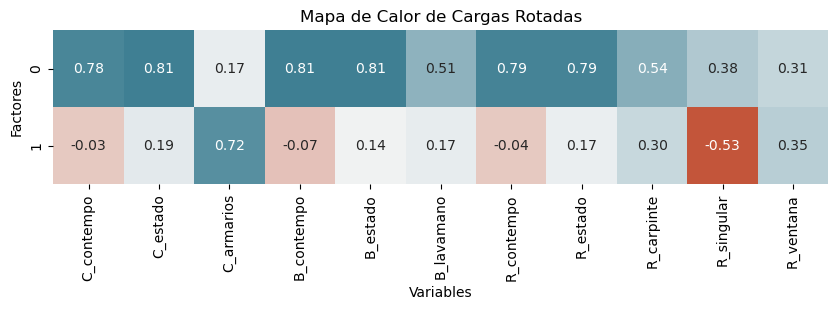

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los colores para el mapa de calor
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Crear el mapa de calor
plt.figure(figsize=(10, 2)) #Altura y ancho, lo pueden variar
sns.heatmap(rotated_df, cmap=cmap, annot=True, fmt=".2f", cbar=False, vmin=rotated_df.min().min(), vmax=rotated_df.max().max())
plt.title('Mapa de Calor de Cargas Rotadas')
plt.xlabel('Variables')
plt.ylabel('Factores')
plt.show()

Veo que los valores `0` me acercan a medir el estado de la contemporaneidad y calidad, mientras que los `1` me acercan a medir la ausencia de singularidad y a la posibilidad de tener armarios en la cocina. 

Por tanto, los denomino así y los incluyo en mi base de datos inicial.

In [21]:
# Obtener los factores extraídos
factors = fa.transform(df)

# Agregar los factores al DataFrame original
h['Estado_contemporaneidad_calidad'] = factors[:, 0] #Este es el número que me interesa
h['Ausencia_singulares_presencia_arm_cocina'] = factors[:, 1] #Este es el número que me interesa

In [23]:
print(h.columns.tolist())

['OBJECTID_1', 'codigo_inmueble1', 'Title', 'Type_build', 'Type_opera', 'Link', 'Location', 'Lat_X', 'Lon_Y', 'Climatic_Z', 'Nom_Mun', 'precio_eur', 'superficie', 'superficie_2', 'Unit_price', 'Ln_total_pr', 'Ln_unit_pr', 'numero_habitaciones', 'numero_bano', 'ratio_bano_hab', 'numero_aseo', 'ascensor', 'interac_planta', 'numero_de_piso', 'anyo_constr', 'anyo_constr_ponderad', 'antig_ponderad', 'Inverse_Age', 'Year_Before_1981', 'Year_1982_2006', 'Year_After_2007', 'superficie_terraza_m2', 'grand_terr_20m2', 'superficie_jardin_m2', 'superficie_salon', 'bool_despacho', 'bool_buhardilla', 'bool_trastero', 'bool_lavadero', 'bool_piscina_comunitaria', 'bool_jardin_comunitario', 'bool_amueblado', 'bool_ascensor', 'descripcion', 'bool_aire_acondicionado', 'bool_calefaccion', 'bool_chimenea', 'texto_destacado', 'Description', 'calificacion_consumo_letra', 'calificacion_consumo_valor', 'calificacion_emision_letra', 'calificacion_emision_valor', 'Dum_EPC', 'EPC_A_emision', 'EPC_B_emision', 'EPC

Ya están mis dos factores nuevos. Ahora guardo mi nueva base de datos.

In [24]:
h.to_csv('data/datos4k.csv')